Import the Libraries:

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [194]:
pd.set_option('display.max_columns', None)

In [195]:
#Load the data
df=pd.read_csv("city hotel & resort hotel.csv.csv")

In [196]:
#Get the datatypesof the columns
df.dtypes

Timestamp                                                    object
What do you like to prefer more?                             object
Why do you like to hangout in this hotel?                    object
Which kind of facilities are given in COVID-19 situation?    object
Are you satisfied with the above facilities?                 object
What was the reason for your visit?                          object
Were you alone or in a group?                                object
Why  did you choose this hotel?                              object
Were the staff friendly and helpful?                         object
Did you eat at the hotel?                                    object
How would you rate the hotel?                                object
Food Hygiene rating.                                         object
How Likely are you to stay at this hotel again?              object
Overall were you satisfied ,dissatisfied , or neither?       object
Would you like to suggest them to improve their 

In [197]:
#looking at first rows of the data
df.head()

,Timestamp,What do you like to prefer more?,Why do you like to hangout in this hotel?,Which kind of facilities are given in COVID-19 situation?,Are you satisfied with the above facilities?,What was the reason for your visit?,Were you alone or in a group?,Why did you choose this hotel?,Were the staff friendly and helpful?,Did you eat at the hotel?,How would you rate the hotel?,Food Hygiene rating.,How Likely are you to stay at this hotel again?,"Overall were you satisfied ,dissatisfied , or neither?",Would you like to suggest them to improve their service?,How Likely are you to recommend this hotel?
0,20/02/2021 13:13:48,Resort hotel,Good Environment,Sanitization,Yes,Budget friendly,Group,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,Resort hotel,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,City hotel,Good Environment,"Sanitization, Temperature Checking",No,For the trip,Group,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel


In [198]:
df.rename(columns={'What do you like to prefer more?':'Hotel Type',
                   'Why do you like to hangout in this hotel?':'Hangout',
                  'Which kind of facilities are given in COVID-19 situation?':'COVID-19 Situation',
                  'Are you satisfied with the above facilities?':'satisfied',
                  'What was the reason for your visit?':'Reason',
                   'Were you alone or in a group?':'Visit Types',
                  'Why did you choose this hotel?':'Choose this hotel',
                  'Were the staff friendly and helpful?':'staff friendly and helpful',
                  'Did you eat at the hotel?':'eat at the hotel',
                  'How would you rate the hotel?':'Rating',
                  'Food Hygiene rating':'Food Hygiene',
                  'How Likely are you to stay at this hotel again?':'stay hotel again',
                  'Overall were you satisfied ,dissatisfied , or neither? ':'Overall',
                  'Would you like to suggest them to improve their service? ':'Suggestion','How Likely are you to recommend this hotel?':'Recommend'},inplace=True)

In [199]:
df.head()

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Why did you choose this hotel?,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,Resort hotel,Good Environment,Sanitization,Yes,Budget friendly,Group,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,Resort hotel,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,City hotel,Good Environment,"Sanitization, Temperature Checking",No,For the trip,Group,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel


In [200]:
df = df.rename(columns = {"Why  did you choose this hotel?" : "Choose Hotel"})

In [201]:
df = df.rename(columns = {"Overall were you satisfied, dissatisfied or neither?":"Overall"})

In [202]:
df.columns

Index(['Timestamp', 'Hotel Type', 'Hangout', 'COVID-19 Situation', 'satisfied',
       'Reason', 'Visit Types', 'Choose Hotel', 'staff friendly and helpful',
       'eat at the hotel', 'Rating', 'Food Hygiene rating.',
       'stay hotel again', 'Overall', 'Suggestion', 'Recommend'],
      dtype='object')

In [203]:
df

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,Resort hotel,Good Environment,Sanitization,Yes,Budget friendly,Group,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,Resort hotel,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,For the trip,Group,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,City hotel,Good Environment,"Sanitization, Temperature Checking",No,For the trip,Group,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,22/04/2021 19:41:57,City hotel,Affordable,Sanitization,Yes,For the trip,Alone,Hotel Loyalty,Yes,Yes,Good,Very Good,Yes,Satisfied,Yes,8/10
197,22/04/2021 19:42:25,Resort hotel,Affordable,Temperature Checking,Yes,Affordable,Group,Hotel Loyalty,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,8/10
198,22/04/2021 19:44:23,City hotel,Affordable,Temperature Checking,Yes,Affordable,Alone,Good Facility,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,7/10
199,22/04/2021 19:44:46,Resort hotel,Good Environment,Temperature Checking,Yes,Affordable,Alone,Acessibility,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,8/10


In [204]:
df['Visit Types'] = df['Visit Types'].replace({'Alone':0,'Group':1})

In [205]:
df['Reason'] = df['Reason'].replace({'Budget friendly':0, 'For the trip':1, 'Affordable':2, 'Facility':3, 'other':4})

In [206]:
features=df.Reason.unique()
features

array([0, 1, 2, 3, 4], dtype=int64)

In [207]:
df.head()

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,Resort hotel,Good Environment,Sanitization,Yes,0,1,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,Resort hotel,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,Resort hotel,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,City hotel,Good Environment,"Sanitization, Temperature Checking",No,1,1,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel


In [208]:
df['Hotel Type'] = df['Hotel Type'].replace({'City hotel':0,'Resort hotel':1})


In [209]:
df.head()

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,1,Good Environment,Sanitization,Yes,0,1,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,1,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,0,Good Environment,"Sanitization, Temperature Checking",No,1,1,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel


In [210]:
#df['Hangout'] = df['Hangout'].replace({'Facility':0,'Good Environment':1,'Affordable':2,'Food and Traditional Dish':3,'Facility, Good Environment, Affordable, Food and Traditional Dish':4,'Good Environment, Affordable, Food and Traditional Dish':5,'Facility, Good Environment, Food and Traditional Dish':6,'Facility, Good Environment, Affordable':7, 'Facility, Affordable':8,'Facility, Food and Traditional Dish':9,'Good Environment, Food and Traditional Dish':10,'Facility, Affordable, Food and Traditional Dish':11,'Facility, Good Environment':12,'Good Environment, Affordable':13,'Affordable, Food and Traditional Dish':14})

In [211]:
h=df.Hangout.unique()
h

array(['Good Environment',
       'Facility, Good Environment, Affordable, Food and Traditional Dish',
       'Facility, Good Environment', 'Affordable',
       'Good Environment, Affordable, Food and Traditional Dish',
       'Good Environment, Affordable', 'Facility',
       'Facility, Good Environment, Food and Traditional Dish',
       'Affordable, Food and Traditional Dish',
       'Food and Traditional Dish',
       'Facility, Good Environment, Affordable', 'Facility, Affordable',
       'Facility, Food and Traditional Dish',
       'Good Environment, Food and Traditional Dish',
       'Facility, Affordable, Food and Traditional Dish'], dtype=object)

In [212]:
df.head()

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,1,Good Environment,Sanitization,Yes,0,1,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,1,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,0,Good Environment,"Sanitization, Temperature Checking",No,1,1,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel


In [213]:
df.rename(columns={'What do you like to prefer more?':'Hotel Type', })

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
0,20/02/2021 13:13:48,1,Good Environment,Sanitization,Yes,0,1,Good Facility,Yes,Yes,Excellent,Excellent,Yes,Satisfied,No,Very Nice
1,20/02/2021 13:16:53,1,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
2,20/02/2021 13:46:01,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
3,20/02/2021 13:46:08,1,"Facility, Good Environment","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Excellent,Very Good,May be,Satisfied,No,Very good
4,20/02/2021 13:57:17,0,Good Environment,"Sanitization, Temperature Checking",No,1,1,"Good Facility, Acessibility, Dinning Option, S...",Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,Yes I will recommend this hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,22/04/2021 19:41:57,0,Affordable,Sanitization,Yes,1,0,Hotel Loyalty,Yes,Yes,Good,Very Good,Yes,Satisfied,Yes,8/10
197,22/04/2021 19:42:25,1,Affordable,Temperature Checking,Yes,2,1,Hotel Loyalty,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,8/10
198,22/04/2021 19:44:23,0,Affordable,Temperature Checking,Yes,2,0,Good Facility,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,7/10
199,22/04/2021 19:44:46,1,Good Environment,Temperature Checking,Yes,2,0,Acessibility,Yes,Yes,Very Good,Very Good,Yes,Satisfied,Yes,8/10


In [214]:
#Check for any duplicate values
df.duplicated().sum()

0

In [215]:
duplicate = df[df.duplicated()]
duplicate

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend


In [216]:
df_New=pd.DataFrame.drop_duplicates(df)

In [217]:
df_New.duplicated().sum()

0

In [218]:
df.isnull().sum()

Timestamp                     0
Hotel Type                    0
Hangout                       0
COVID-19 Situation            0
satisfied                     0
Reason                        0
Visit Types                   0
Choose Hotel                  0
staff friendly and helpful    0
eat at the hotel              0
Rating                        0
Food Hygiene rating.          0
stay hotel again              0
Overall                       0
Suggestion                    0
Recommend                     0
dtype: int64

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Timestamp                   201 non-null    object
 1   Hotel Type                  201 non-null    int64 
 2   Hangout                     201 non-null    object
 3   COVID-19 Situation          201 non-null    object
 4   satisfied                   201 non-null    object
 5   Reason                      201 non-null    int64 
 6   Visit Types                 201 non-null    int64 
 7   Choose Hotel                201 non-null    object
 8   staff friendly and helpful  201 non-null    object
 9   eat at the hotel            201 non-null    object
 10  Rating                      201 non-null    object
 11  Food Hygiene rating.        201 non-null    object
 12  stay hotel again            201 non-null    object
 13  Overall                     201 non-null    object

In [220]:
#check for missing values
pd.DataFrame(round(df.isnull().sum()/df.shape[0]*100,3),columns=["Missing"])

,Missing
Timestamp,0.0
Hotel Type,0.0
Hangout,0.0
COVID-19 Situation,0.0
satisfied,0.0
Reason,0.0
Visit Types,0.0
Choose Hotel,0.0
staff friendly and helpful,0.0
eat at the hotel,0.0


In [221]:
#df.drop(columns="Recommend", inplace= True)
#df_New

In [222]:
#df['What do you like to prefer more?'].describe()
df['Hotel Type'].describe()

count    201.000000
mean       0.616915
std        0.487352
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Hotel Type, dtype: float64

In [223]:
#df['Why do you like to hangout in this hotel?'].describe()
df['Hangout'].describe()

count                  201
unique                  15
top       Good Environment
freq                    51
Name: Hangout, dtype: object

In [224]:
#df['Which kind of facilities are given in COVID-19 situation?'].describe()
df['COVID-19 Situation'].describe()

count                                                  201
unique                                                  13
top       Sanitization, Temperature Checking, Mask, Gloves
freq                                                    46
Name: COVID-19 Situation, dtype: object

In [225]:
#df['Are you satisfied with the above facilities?'].describe()
df['satisfied'].describe()

count     201
unique      2
top       Yes
freq      192
Name: satisfied, dtype: object

In [226]:
#df['What was the reason for your visit?'].describe()
df['Reason'].describe()

count    201.000000
mean       1.412935
std        1.184750
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Reason, dtype: float64

In [227]:
#df['Were you alone or in a group?'].describe()
df['Visit Types'].describe()

count    201.000000
mean       0.746269
std        0.436232
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Visit Types, dtype: float64

In [228]:
#df['Why  did you choose this hotel?'].describe()
df['Choose Hotel'].describe()

count               201
unique               29
top       Good Facility
freq                 70
Name: Choose Hotel, dtype: object

In [229]:
#df['Were the staff friendly and helpful?'].describe()
df['staff friendly and helpful'].describe()

count     201
unique      2
top       Yes
freq      196
Name: staff friendly and helpful, dtype: object

In [230]:
#df['Did you eat at the hotel?'].describe()
df['eat at the hotel'].describe()

count     201
unique      2
top       Yes
freq      181
Name: eat at the hotel, dtype: object

In [231]:
#df['How would you rate the hotel?'].describe()
df['Rating'].describe()

count           201
unique            4
top       Very Good
freq             87
Name: Rating, dtype: object

In [232]:
#df['Food Hygiene rating.'].describe()
df['Food Hygiene rating.'].describe()

count           201
unique            7
top       Excellent
freq             49
Name: Food Hygiene rating., dtype: object

In [233]:
#df['How Likely are you to stay at this hotel again?'].describe()
df['stay hotel again'].describe()

count     201
unique      3
top       Yes
freq      114
Name: stay hotel again, dtype: object

In [234]:
#df['Overall were you satisfied ,dissatisfied , or neither? '].describe()
df['Overall'].describe()

count           201
unique            4
top       Satisfied
freq            166
Name: Overall, dtype: object

In [235]:
#df['Would you like to suggest them to improve their service? '].describe()
df['Suggestion'].describe()

count     201
unique      2
top       Yes
freq      131
Name: Suggestion, dtype: object

In [236]:
# Resort Hotel=1 ,City Hotel=0

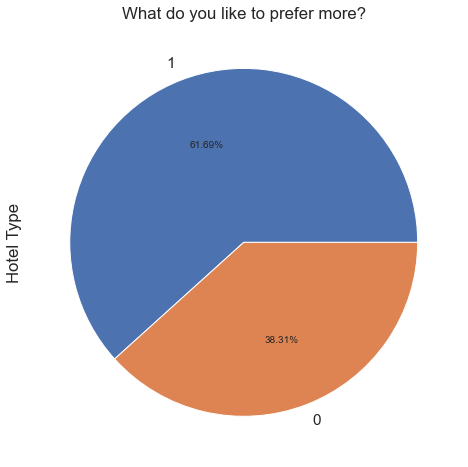

In [237]:
df['Hotel Type'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(8,8))
plt.title("What do you like to prefer more?")
plt.show()

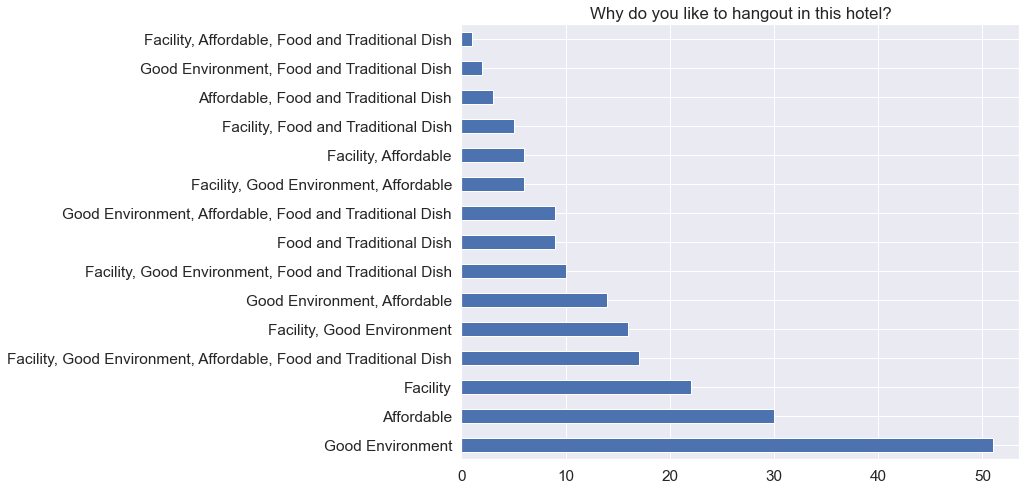

In [238]:
df['Hangout'].value_counts().plot(kind='barh',figsize=(10,8))
plt.title("Why do you like to hangout in this hotel?")
plt.show()

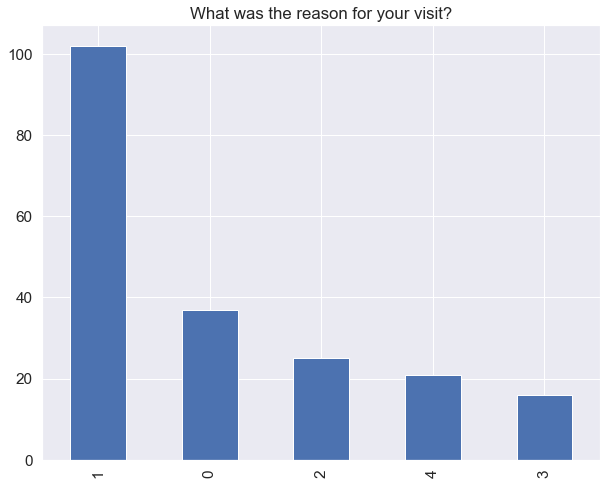

In [239]:
df['Reason'].value_counts().plot(kind='bar',figsize=(10,8))
plt.title("What was the reason for your visit?")
plt.show()

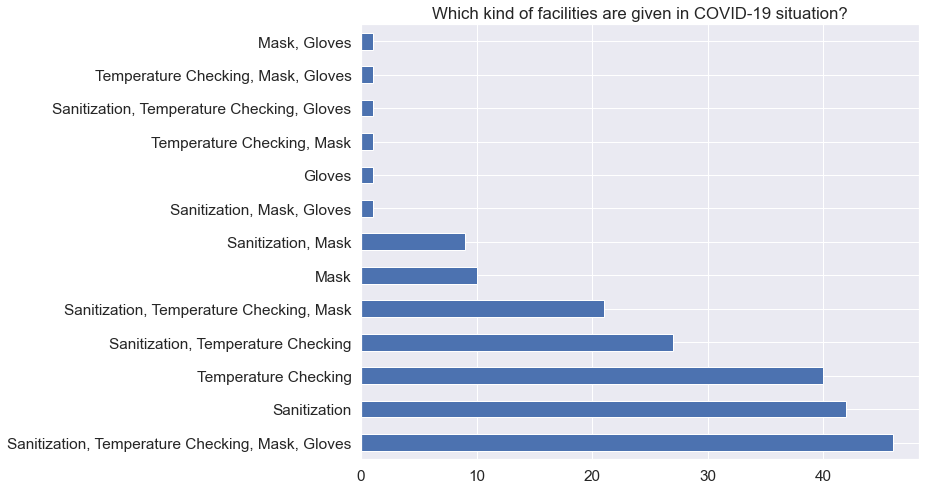

In [240]:
df['COVID-19 Situation'].value_counts().plot(kind='barh',figsize=(10,8))
plt.title("Which kind of facilities are given in COVID-19 situation?")
plt.show()

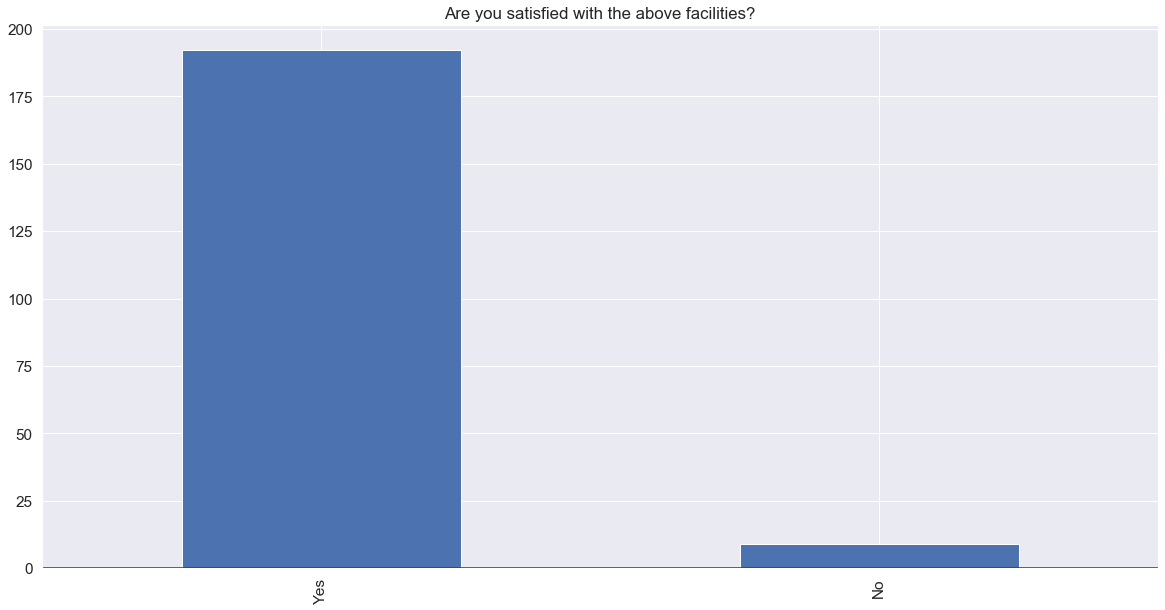

In [241]:
df['satisfied'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title("Are you satisfied with the above facilities?")
plt.axhline(0, color="k");


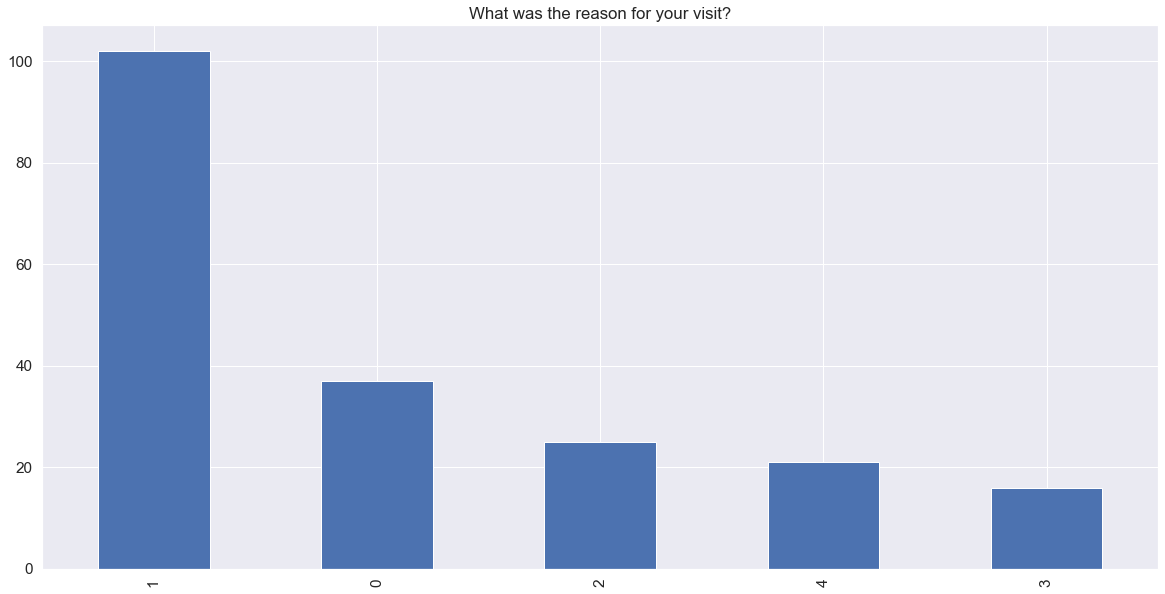

In [242]:

df['Reason'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title("What was the reason for your visit?")
plt.show()

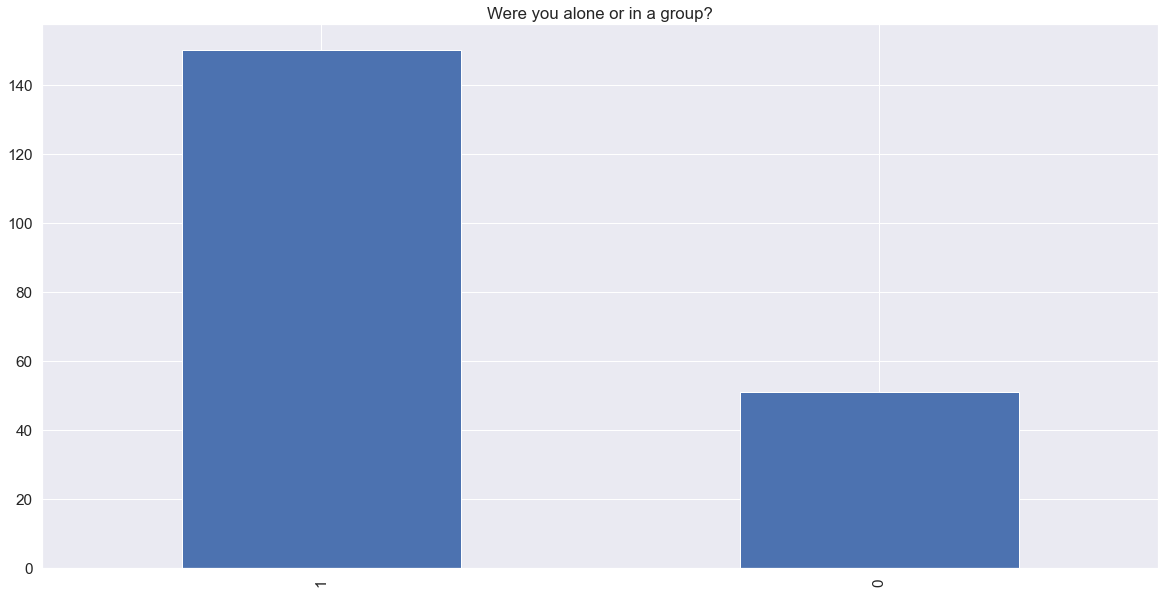

In [243]:
#'Alone':0,'Group':1
df['Visit Types'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title("Were you alone or in a group?")
plt.show()

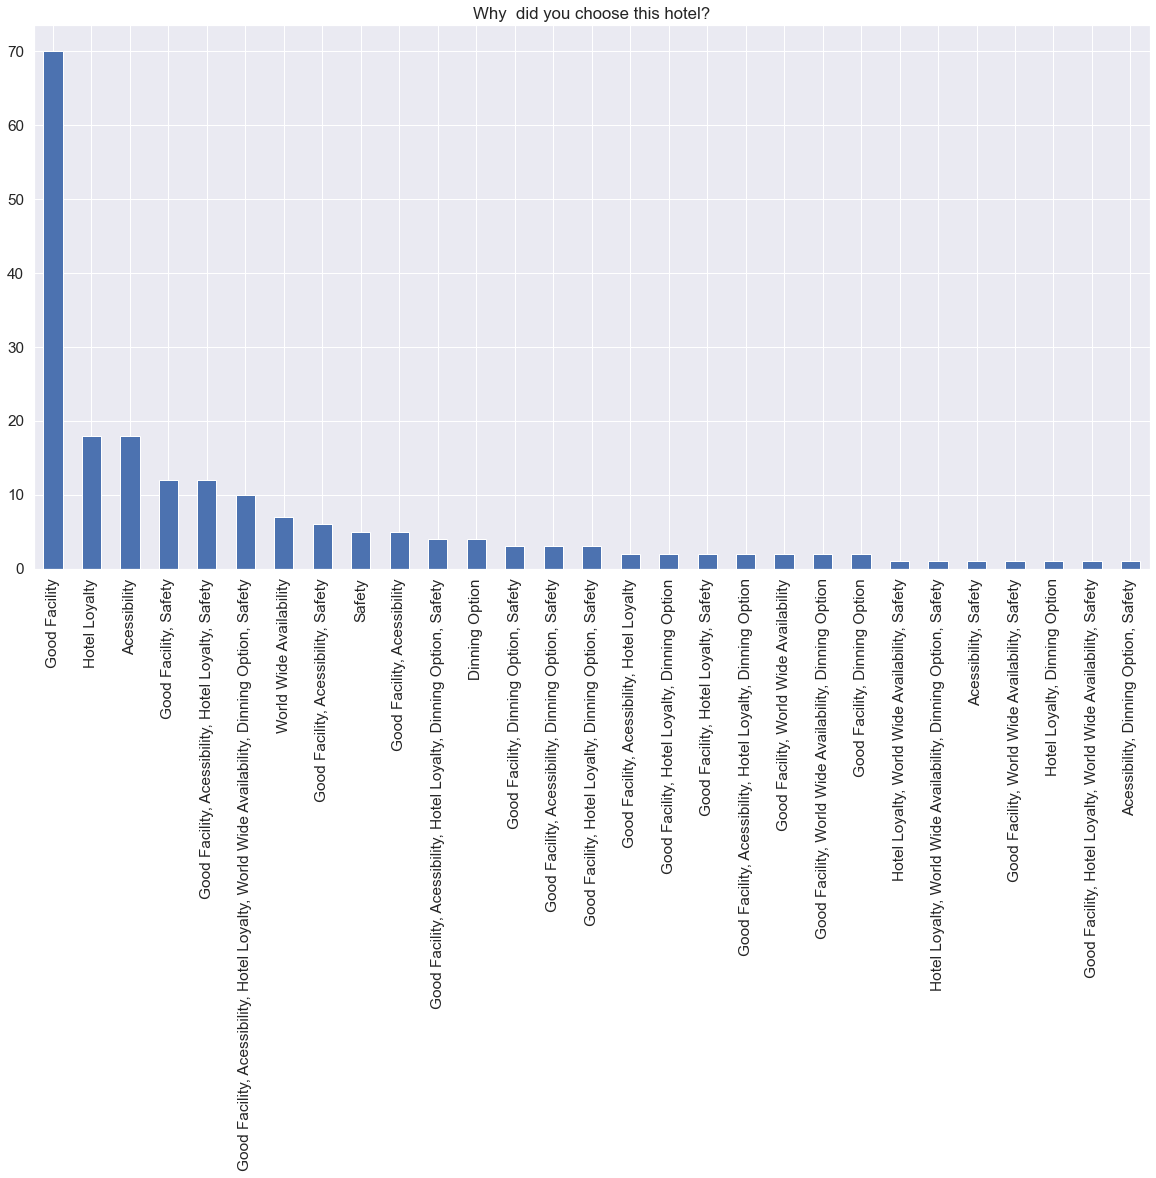

In [244]:
df['Choose Hotel'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title("Why  did you choose this hotel?")
plt.show()

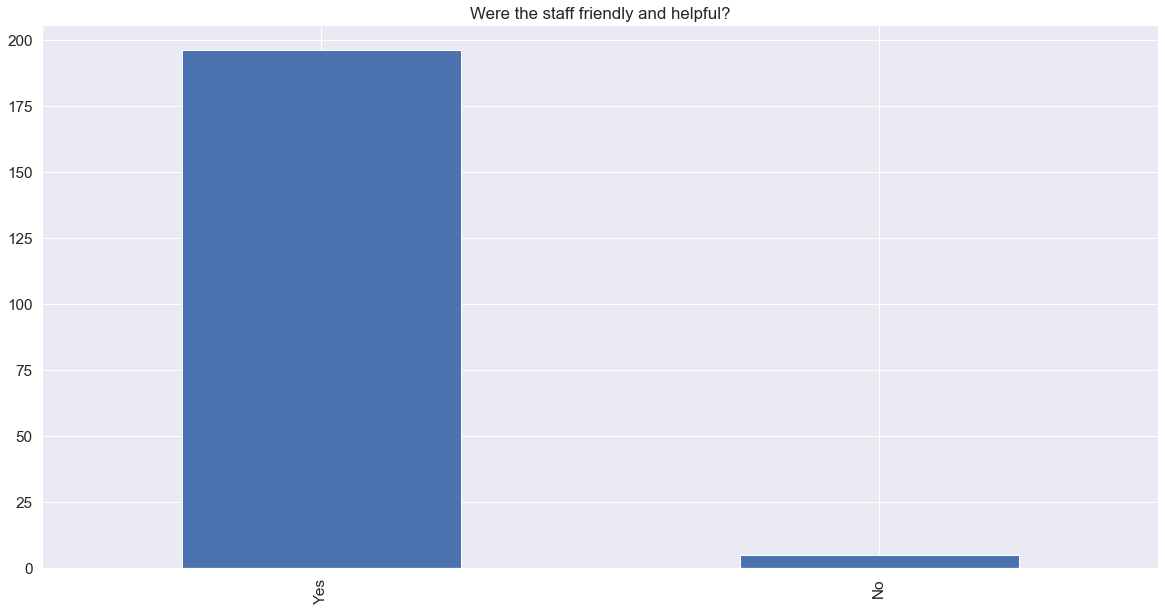

In [245]:
df['staff friendly and helpful'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title("Were the staff friendly and helpful?")
plt.show()

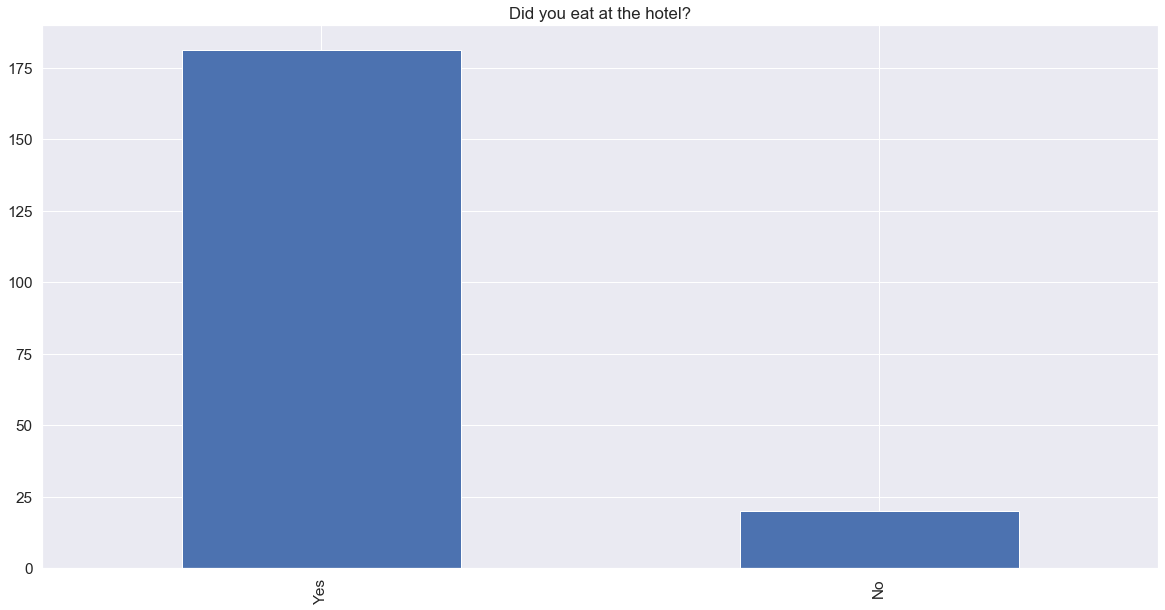

In [246]:
df['eat at the hotel'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title("Did you eat at the hotel?")
plt.show()

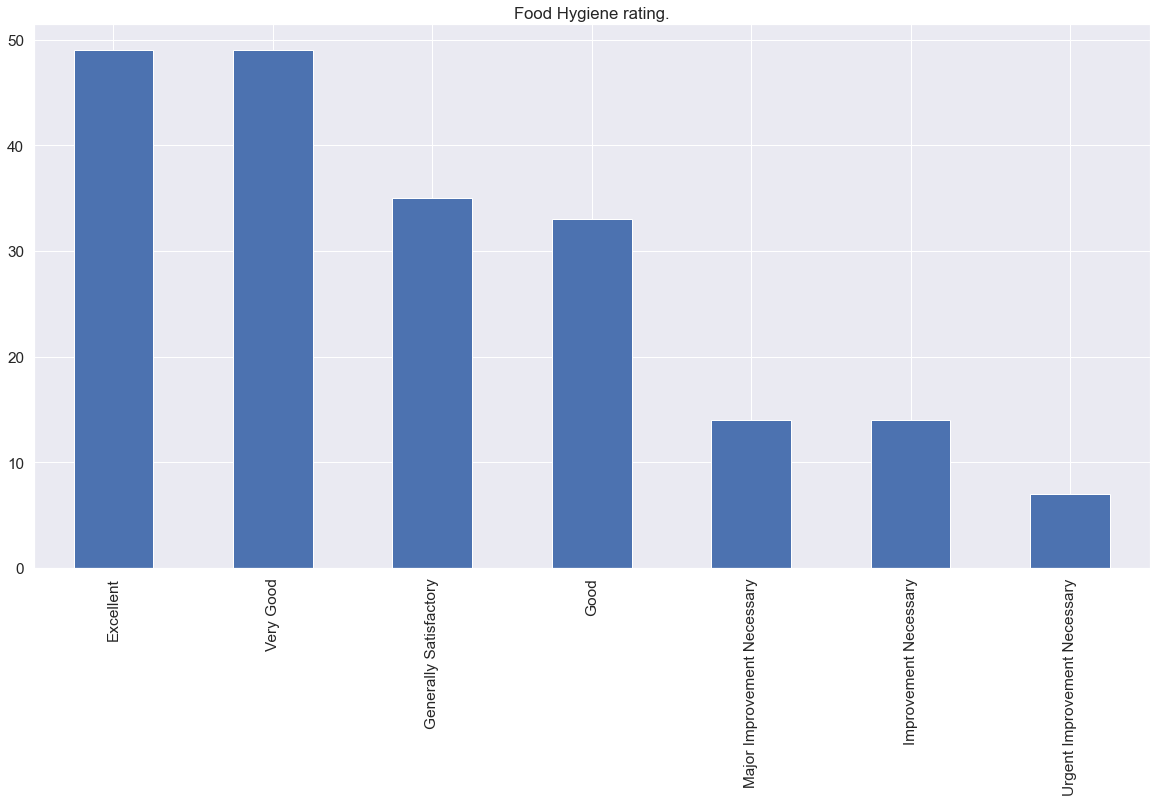

In [247]:
df['Food Hygiene rating.'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title("Food Hygiene rating.")
plt.show()

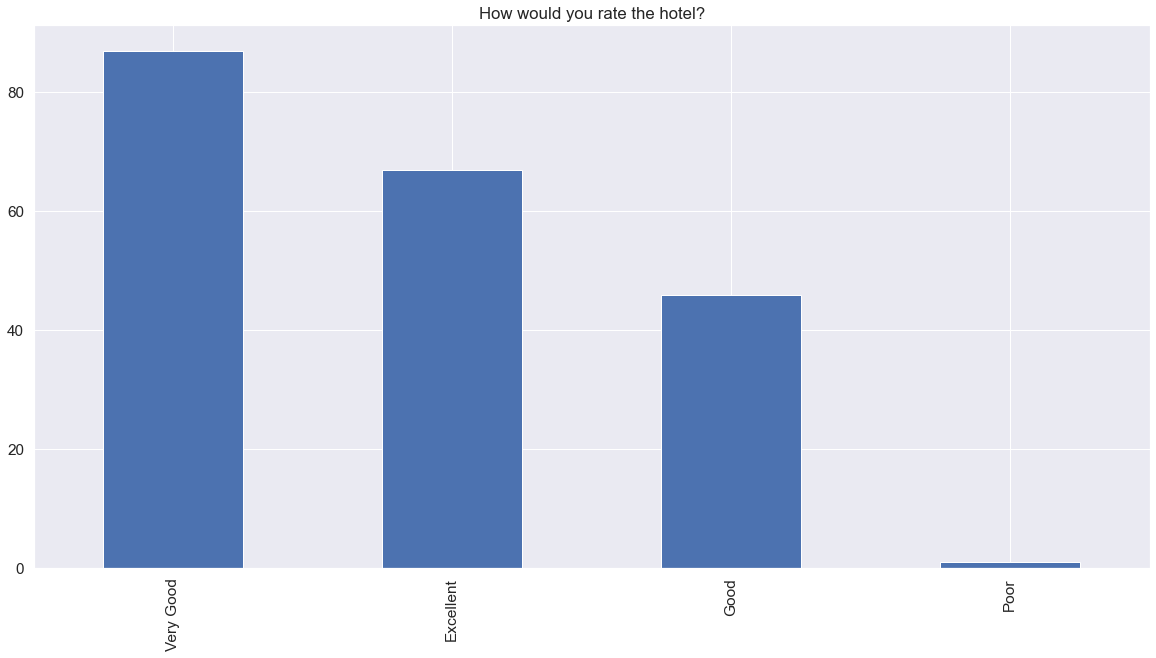

In [248]:
df['Rating'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title("How would you rate the hotel?")
plt.show()

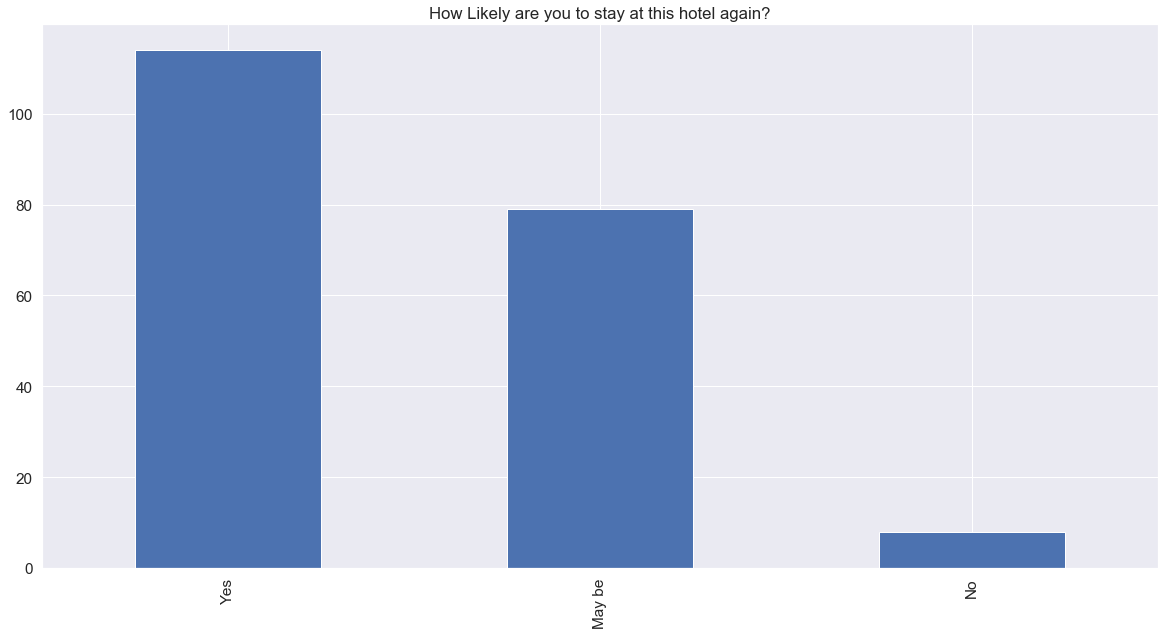

In [249]:
df['stay hotel again'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title("How Likely are you to stay at this hotel again?")
plt.show()

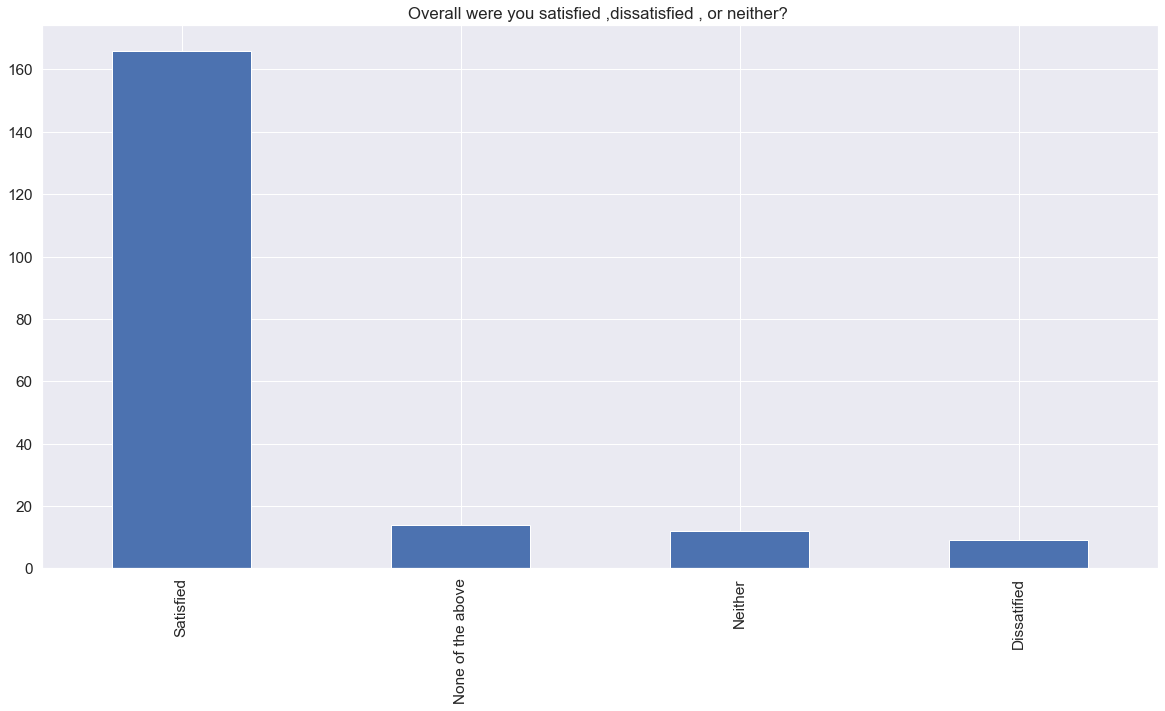

In [250]:
df['Overall'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title('Overall were you satisfied ,dissatisfied , or neither? ')
plt.show()

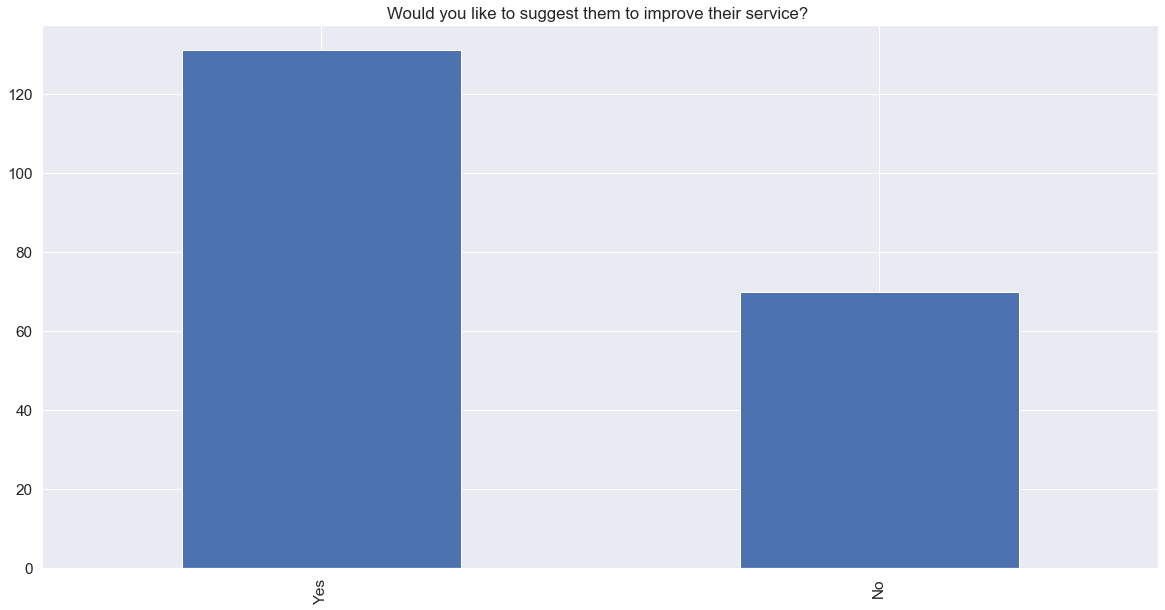

In [251]:
df['Suggestion'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title('Would you like to suggest them to improve their service? ')
plt.show()

In [252]:
#df['Rating'] = df['Rating'].replace({'Excellent':1,'Very Good':2,'Good':3,'Poor':4})

In [253]:
from sklearn.model_selection import train_test_split


In [ ]:
train, test = train_test_split(df,test_size=0.25)

In [261]:
train.shape

(150, 16)

In [262]:
test.shape

(51, 16)

In [263]:
test.head()

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
133,07/04/2021 16:57:08,1,Good Environment,Sanitization,Yes,1,1,Good Facility,Yes,Yes,Very Good,Excellent,Yes,Satisfied,No,10_20
88,21/02/2021 15:29:52,0,"Facility, Affordable, Food and Traditional Dish","Sanitization, Temperature Checking, Mask",Yes,4,1,"Good Facility, Safety",Yes,Yes,Good,Good,May be,Satisfied,No,Nothing
49,20/02/2021 21:40:45,1,Good Environment,Temperature Checking,Yes,1,1,Good Facility,Yes,Yes,Very Good,Very Good,May be,Satisfied,Yes,Pallavi Avaida
64,20/02/2021 22:49:59,1,"Facility, Good Environment, Food and Tradition...","Sanitization, Temperature Checking, Mask, Gloves",Yes,1,1,"Good Facility, Safety",Yes,Yes,Very Good,Major Improvement Necessary,Yes,Satisfied,No,On scale of 10 I'll give 9
63,20/02/2021 22:30:49,1,"Good Environment, Affordable","Sanitization, Temperature Checking, Mask",Yes,1,0,World Wide Availability,Yes,Yes,Good,Improvement Necessary,Yes,Satisfied,No,Ok


In [264]:
train.head()

,Timestamp,Hotel Type,Hangout,COVID-19 Situation,satisfied,Reason,Visit Types,Choose Hotel,staff friendly and helpful,eat at the hotel,Rating,Food Hygiene rating.,stay hotel again,Overall,Suggestion,Recommend
1,20/02/2021 13:16:53,1,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask",Yes,1,1,Good Facility,Yes,Yes,Good,Generally Satisfactory,May be,Satisfied,Yes,good
118,08/03/2021 06:29:51,0,Affordable,Temperature Checking,Yes,0,1,Acessibility,Yes,Yes,Excellent,Very Good,May be,Satisfied,Yes,I would like to recommend this hotel
115,06/03/2021 22:42:28,1,"Facility, Good Environment, Affordable, Food a...","Sanitization, Temperature Checking, Mask, Gloves",Yes,1,1,"Good Facility, Hotel Loyalty, Dinning Option, ...",Yes,No,Good,Good,Yes,Satisfied,No,Good
100,21/02/2021 23:41:03,1,"Good Environment, Affordable","Sanitization, Temperature Checking, Mask, Gloves",Yes,1,1,Good Facility,Yes,Yes,Very Good,Generally Satisfactory,May be,Satisfied,Yes,Yes
95,21/02/2021 22:56:47,1,Good Environment,Mask,No,3,1,Good Facility,Yes,Yes,Good,Very Good,May be,Satisfied,Yes,Yes


In [265]:
c1 = DecisionTreeClassifier(min_samples_split=100)
c2 = DecisionTreeClassifier(min_samples_split=10)

In [266]:
features =['Visit Types','Reason','Hotel Type']

In [267]:
train, test = train_test_split(df_New, test_size=0.25)

In [268]:
X_train = train[features]
Y_train = train['satisfied']

In [269]:
X_test = train[features]
Y_test = train['satisfied']

In [270]:
tree1 = c1.fit(X_train, Y_train)
tree2 = c2.fit(X_train, Y_train)

In [271]:
y_pred_t1 = c1.predict(X_train)
y_pred_t2 = c2.predict(X_train)

In [272]:
y_pred1 = c1.predict(X_test)
y_pred2 = c2.predict(X_test)

In [273]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [274]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [275]:
conda install pydot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [277]:
from sklearn.tree import DecisionTreeClassifier

In [278]:
dtree_algo = DecisionTreeClassifier()

In [279]:
dtree = dtree_algo.fit(X_train, Y_train)

In [280]:
dtree_pred= dtree_algo.predict(X_train)

In [281]:
dtree_test_pred= dtree_algo.predict(X_test)

In [282]:
print(confusion_matrix(Y_train,dtree_pred))

[[  4   4]
 [  4 138]]


In [283]:
print(confusion_matrix(Y_test,dtree_test_pred))

[[  4   4]
 [  4 138]]


In [284]:
print(accuracy_score(Y_train,dtree_pred))

0.9466666666666667


In [285]:
print(accuracy_score(Y_test,dtree_test_pred))

0.9466666666666667


In [286]:
print(classification_report(Y_train,dtree_pred))

              precision    recall  f1-score   support

          No       0.50      0.50      0.50         8
         Yes       0.97      0.97      0.97       142

    accuracy                           0.95       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.95      0.95      0.95       150



In [287]:
print(classification_report(Y_test,dtree_test_pred))

              precision    recall  f1-score   support

          No       0.50      0.50      0.50         8
         Yes       0.97      0.97      0.97       142

    accuracy                           0.95       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.95      0.95      0.95       150



# Support Vector Machine

In [289]:
from sklearn import svm

In [290]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=3)

In [291]:

model_svm = svmf.fit(X_train, Y_train)

In [292]:
pred_svm = model_svm.predict(X_test)

In [293]:
sat_test_score_svm = accuracy_score(Y_test, pred_svm)*100
sat_test_score_svm

94.66666666666667